In [1]:
from lenskit.metrics import dataGenerator
from lenskit import batch, topn, util, topnFair
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit import topn, topnFair

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
#ratings = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/ratings.1.csv', sep=',',
#                      names=['user', 'item', 'rating', 'timestamp'], header=0)

#items = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/movies.csv', sep=',',
#                      names=['movieId','title','genres'], header=0)

ratings = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/ml-latest-small/ratings.1.csv', sep=',',
                      names=['user', 'item', 'rating', 'timestamp'], header=0)

items = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/ml-latest-small/movies.csv', sep=',',
                      names=['item','title','genres'], header=0)

#C:\Users\josse\Git-kode projects\Speciale\Fair-Recommendations\ml-latest-small\ratings.csv

In [4]:
#items

In [5]:
items_dummy = pd.concat([items, items['genres'].str.get_dummies(sep='|')], axis=1)
items_dummy.head()

,item,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
algo_ii = knn.ItemItem(20)
algo_als = als.BiasedMF(50)

In [7]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

In [8]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 1, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))
    

test _reccomend
test _reccomend


In [9]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs_joined = all_recs.join(items_dummy.set_index('item'), on='item')
all_recs_joined.head()

,item,score,user,rank,Algorithm,title,genres,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1961,3.50,1,1,ItemItem,Rain Man (1988),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1022,3.50,1,2,ItemItem,Cinderella (1950),Animation|Children|Fantasy|Musical|Romance,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,919,3.50,1,3,ItemItem,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,296,3.50,1,4,ItemItem,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1580,3.25,1,5,ItemItem,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
test_data = pd.concat(test_data, ignore_index=True)
test_data.head()

,user,item,rating
0,1,2150,3.0
1,1,1371,2.5
2,1,1129,2.0
3,1,2294,2.0
4,2,410,3.0


In [11]:
#all_recs_joined['item'].values

In [12]:
_protected_group2 = all_recs_joined.loc[all_recs_joined['Action'] == 1]
_protected_group2.head()
_protected_group2['item'].values

array([ 1580,  2716,  1580,  2716,  8636,  5349,  1953,  1544,  2193,
        1953,  1544,  2193,   592,  8636,  5349,   377,   592,  1580,
        2716,  1953,  2193,  1197,  2959,  2028,  1378,  1198,  1208,
        1200,  1291,  1220,  1196,  2628,  2115,  2000,  2005,  1240,
        1387,  1127,  2640,  2723,   541,   260,  3208,  1918,  1377,
         380,  2002,   173,  1372,  1544,  2683,   442,  1917,   153,
        2916,   464,   434,  2403,  2094,  3104,  1374,   610,  1356,
        8636,  5349,  1197,  1953,  1387,  2628,  2640,  1291,  2723,
         541,   260,  1240,  2115,  2005,  2000,  2991,  1127,  1196,
        1198,  1208,  1220,  1200,   589,  2105,  3753,  2959,  2028,
        1378,   474,   405,   370,  8644,  2273, 41569,  3753,   485,
         208,   168,   589,  2716,  1953,  1291,  2005,  2000,  2115,
        1127,  1220,  1208,  1200,  1198,  1387,  1196,  2991,   541,
         260,  1240,  2723,  2640,  2628,  1580,   592,  2105,  1197,
        2403,  1356,

In [13]:
# user , algorithms = iput to group_cols --> de koloner der skal  groupes på 
rla = topnFair.FairRecListAnalysis(['user', 'Algorithm'])
rla.add_metric("rND")
rla.add_metric("rKL")
rla.add_metric("rRD")
results = rla.compute(all_recs_joined, test_data)
results.head()

['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 100 , proN 21 , measure rND
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 100 , proN 21 , measure rKL
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 100 , proN 21 , measure rRD
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 11 , proN 2 , measure rND
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 11 , proN 2 , measure rKL
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 11 , proN 2 , measure rRD
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0']
calculating normalizer with userN= 100 , proN 24 , measure rND
['1000,548,rKL:100.0\n', '1000,548,rND:100.0\n', '1000,548,rRD:100.0

rND       rKL       rRD
user Algorithm                              
1    ALS        0.117325  0.063146  0.252637
     ItemItem   0.222222  0.041690  0.000000
2    ALS        0.140372  0.029982  0.029493
     ItemItem   0.185185  0.028590  0.000000
3    ALS        0.212169  0.095653  0.000000

In [14]:
results.groupby('Algorithm').rND.mean()

Algorithm
ALS         0.149900
ItemItem    0.489101
Name: rND, dtype: float64

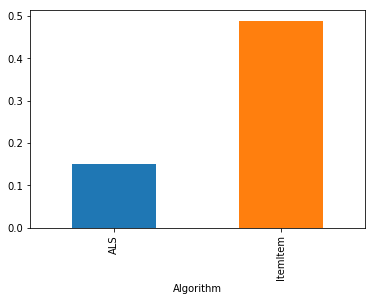

In [15]:
results.groupby('Algorithm').rND.mean().plot.bar()